In [16]:
import astropy
from astropy.table import Table
from astropy.io import ascii

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

File = "data/m-sig_table_con_tc.csv"
data = ascii.read(File) 

data_by_type = data.group_by("Type")

early_type = data_by_type.groups[0:9]
late_type = data_by_type.groups[9:18]

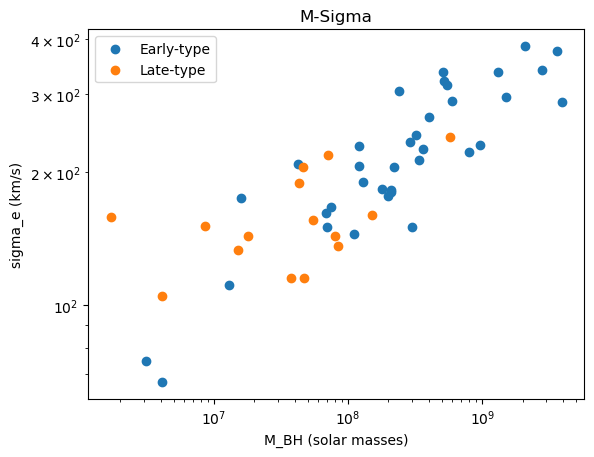

In [56]:
y="sigma_e (km/s)"
x="M_BH (solar masses)"

plt.scatter(early_type[x], early_type[y], label="Early-type")
plt.scatter(late_type[x], late_type[y], label="Late-type")
    
plt.xscale('log')
plt.yscale('log')
plt.title("M-Sigma")
plt.legend()
plt.xlabel(x)
plt.ylabel(y)
plt.show()

The M-$\sigma$ relation, a linear in log-log-space relation between the mass of the central Supermassive Blach Hole and the velocity dispersion of the bulge stars. This relation holds for both early- and late-type galaxies.

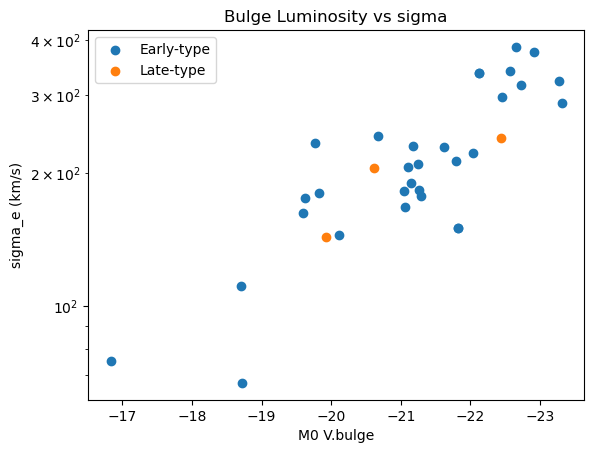

In [76]:
y="sigma_e (km/s)"
x="M0 V.bulge"


plt.scatter(early_type[x], early_type[y], label="Early-type")
plt.scatter(late_type[x], late_type[y], label="Late-type")
    
plt.yscale('log')
plt.gca().invert_xaxis()
plt.title("Bulge Luminosity vs sigma")
plt.legend()
plt.xlabel(x)
plt.ylabel(y)

plt.show()

Interestingly, there also seems to be a log-log-linear realtion between Bulge luminosity and Black Hole mass, though we only have enough data for early-type galaxies. 3 data points for late types is not enough to make statistical statements with any certainty.

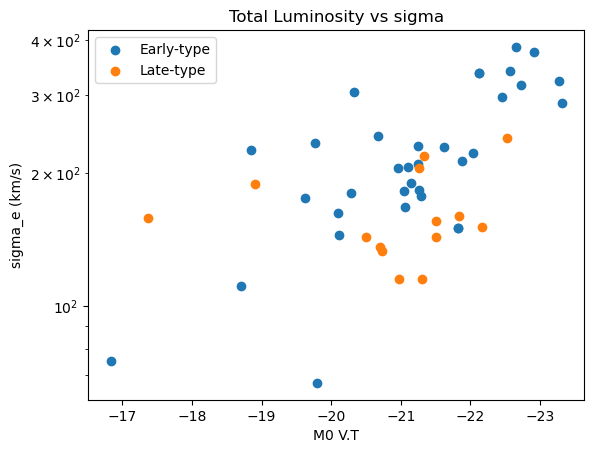

In [115]:
y="sigma_e (km/s)"
x="M0 V.T"


plt.scatter(early_type[x], early_type[y], label="Early-type")
plt.scatter(late_type[x], late_type[y], label="Late-type")
    
plt.yscale('log')
plt.gca().invert_xaxis()
plt.title("Total Luminosity vs sigma")
plt.legend()
plt.xlabel(x)
plt.ylabel(y)

plt.show()

Looking at the total luminosity versus the Blach Hole mass doesnt seem to have much correlation. The spread is way more pronounced than in the previous plots.

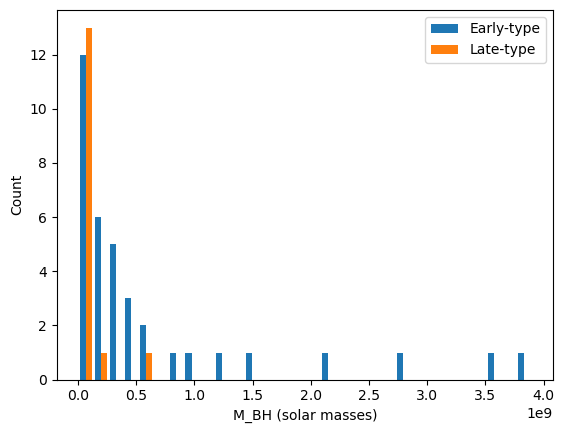

In [99]:
x = "M_BH (solar masses)"

plt.hist((early_type[x], late_type[x]), label = ("Early-type", "Late-type"), bins = 30)

plt.legend()
plt.xlabel(x)
plt.ylabel("Count")
plt.show()

A histogram of Black Hole masses, as can be seen, early-type galaxies have a very spread out distribution of BH masses, with a trailing off tail towards higher masses.

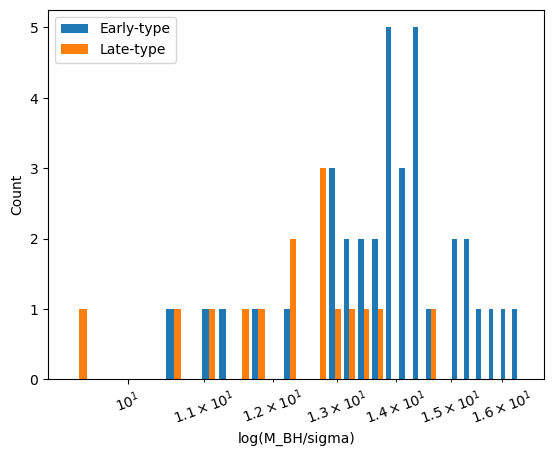

In [113]:
x = "M_BH (solar masses)"
y = "sigma_e (km/s)"

plt.hist((np.log(early_type[x]/early_type[y]), np.log(late_type[x]/late_type[y])), label = ("Early-type", "Late-type"), bins = 30)
plt.xscale("log")

plt.legend()
plt.tick_params(axis = "x", which = "both", labelrotation = 20)
plt.xlabel("log(M_BH/sigma)")
plt.ylabel("Count")
plt.show()

Taking a look at the distribution of Black Hole masses divided by $\sigma$, surprisingly the early-types almost look to be lognormal distributed. We havent yet checked wether they actually are in a lognormal distribution, nor do we know if this is physically relevant, but this definetly warrants a closer look.

194.93037311833345


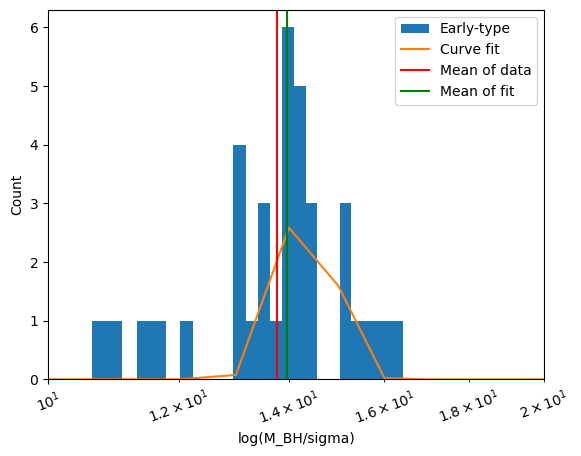

In [134]:
x = "M_BH (solar masses)"
y = "sigma_e (km/s)"
def logfunc(x, mu, sigma):
    return (1/(x*np.sqrt(2*np.pi*sigma**2)))*np.exp((-(np.log(x)-mu)**2)/(2*sigma**2))
bins = 25
plt.hist(np.log(early_type[x]/early_type[y]), label = "Early-type", bins = bins)
y_data, x_data = np.histogram(np.log(early_type[x]/early_type[y]), bins = bins) #This should not be a log, but the fit doesnt give me anything if it isnt
plt.xscale("log")
#print((y_data), (x_data))

popt, pcov = curve_fit(logfunc, x_data[:-1], y_data)
plt.plot(logfunc(x_data, popt[0], popt[1]), label = "Curve fit")
plt.axvline((np.average(a = x_data[:-1], weights = y_data)), color = "r", label = "Mean of data")
plt.axvline(np.exp(popt[0]), color = "g", label = "Mean of fit")

#print(np.exp(2*popt[0]+(popt[1]**2))*(np.exp(popt[1])-1))
#print(np.exp(popt[1])**2)
print(np.exp(2*popt[0]+2*(popt[1]**2)))

plt.legend()
plt.tick_params(axis = "x", which = "both", labelrotation = 20)
plt.xlabel("log(M_BH/sigma)")
plt.ylabel("Count")
plt.xlim(10, 20)
plt.show()
